In [99]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append(os.getcwd() + '/ML')

In [100]:
df= pd.read_csv(r"./timezone-PA-B.csv", sep=',')
df = df.drop_duplicates(subset=['iid'])
dfg= pd.read_csv(r"./PA-AgeGender-Predicted.csv", sep=',')
dfg = dfg.drop_duplicates(subset=['iid'])
main= pd.read_csv(r"./PA2.csv", sep=',')
main = main.drop_duplicates(subset=['iid'])

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning:

Columns (398,497,498,503,504,506,509,512,515,517,518,519,520,525,526,528,531,534,537,539,540,541,542,547,548,550,553,556,559,561,562,592,593,598,599,601,604,607,610,612,613,614,615,620,621,623,626,629,632,634,635,636,637,642,643,645,648,651,654,656,657,662,672,681,682,683,684,685,686,687,688,711,762) have mixed types.Specify dtype option on import or set low_memory=False.



In [101]:
df.shape

(3999, 37)

In [102]:
R1= df[['iid', 'A1', 'A2', 'A3', 'truth', 'text', 'hour']]
R2= df[['iid', 'user.id']]

In [103]:
M=pd.merge(R2, R1, on='iid', how='inner')

In [104]:
M.shape

(3999, 8)

In [105]:
M2=pd.merge(M, dfg, on='user.id', how='inner')

In [106]:
M2=M2[['A1', 'A2', 'A3', 'truth', 'age', 'sex', 'org']]

In [107]:
M2.head()

,A1,A2,A3,truth,age,sex,org
0,0,0,0,0,>=40,female,non-org
1,1,0,0,1,19-29,male,non-org
2,1,1,0,1,19-29,male,non-org
3,0,0,0,0,19-29,male,non-org
4,1,1,1,1,30-39,female,non-org


-----------------------------------------------------------------------------------

In [108]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import getpass
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
from plotly.graph_objs import *

# for configuring connection 
import os

%matplotlib inline


import os


from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

#configure the notebook for use in offline mode
init_notebook_mode(connected=True)

In [109]:
df=M2
missing_values_count = df.isnull().sum()
missing_values_count

A1       0
A2       0
A3       0
truth    0
age      0
sex      0
org      0
dtype: int64

In [110]:
#df= df[df['hour']!='dummy']
df['A1']=df['A1'].astype("category")
df['A2']=df['A2'].astype("category")
df['A3']=df['A3'].astype("category")
df['sex']=df['sex'].astype("category")
df['age']=df['age'].astype("category")
df['org']=df['org'].astype("category")
df['truth']=df['truth'].astype("category")
#df['hour']=df['hour'].astype("int")
df.head()

,A1,A2,A3,truth,age,sex,org
0,0,0,0,0,>=40,female,non-org
1,1,0,0,1,19-29,male,non-org
2,1,1,0,1,19-29,male,non-org
3,0,0,0,0,19-29,male,non-org
4,1,1,1,1,30-39,female,non-org


In [111]:
df= df[df['truth']!=5]
df= df[df['A1']!=5]
df= df[df['A2']!=5]
df= df[df['A3']!=5]


In [112]:
df['truth'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [113]:
df['truth']=np.where(df['truth'] ==1, 'YY', df['truth'])
df['truth']=np.where(df['truth'] =='2', 'YN', df['truth'])
df['truth']=np.where(df['truth'] =='3', 'NY', df['truth'])
df['truth']=np.where(df['truth'] =='4', 'NN', df['truth'])
#df['truth']=np.where(df['truth'] =='5', 'NC', df['truth'])

In [114]:
df = pd.get_dummies(df, prefix=['A1', 'A2', 'A3',  'age', 'sex', 'org'], columns=['A1', 'A2', 'A3', 'age', 'sex', 'org'], drop_first=False)
df.head()

,truth,A1_0,A1_1,A2_0,A2_1,A3_0,A3_1,age_19-29,age_30-39,age_<=18,age_>=40,sex_female,sex_male,org_is-org,org_non-org
0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1
1,YY,0,1,1,0,1,0,1,0,0,0,0,1,0,1
2,YY,0,1,0,1,1,0,1,0,0,0,0,1,0,1
3,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1
4,YY,0,1,0,1,0,1,0,1,0,0,1,0,0,1


In [115]:
import re
regex = re.compile(r"\[|\]|<|>", re.IGNORECASE)
 
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<', '>'))) else col for col in df.columns.values]
X=df.drop('truth', 1)
y=df['truth']
df_cols = list(X)

In [116]:
df.columns

Index(['truth', 'A1_0', 'A1_1', 'A2_0', 'A2_1', 'A3_0', 'A3_1', 'age_19-29',
       'age_30-39', 'age__=18', 'age__=40', 'sex_female', 'sex_male',
       'org_is-org', 'org_non-org'],
      dtype='object')

In [117]:
df.isnull().values.sum()

0

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



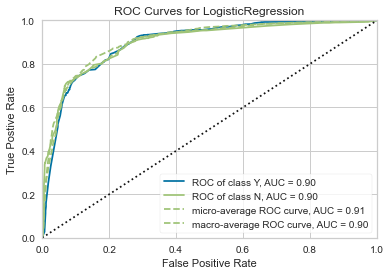

For fold 1:
Accuracy: 0.8353365384615384
f-score: 0.8353365384615385
                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.93      0.71      0.87      0.81      0.67       957
         YY       0.88      0.71      0.93      0.79      0.81      0.64       707

avg / total       0.84      0.84      0.80      0.83      0.81      0.66      1664



/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



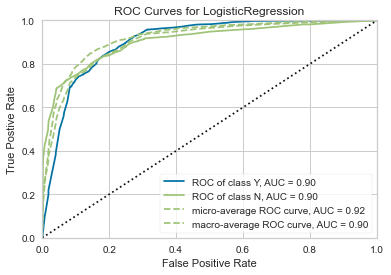

For fold 2:
Accuracy: 0.8509615384615384
f-score: 0.8509615384615384
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.95      0.70      0.89      0.81      0.68      1023
         YY       0.89      0.70      0.95      0.78      0.81      0.64       641

avg / total       0.86      0.85      0.79      0.85      0.81      0.66      1664



In [121]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
classes=['Y','N']


kf = KFold(n_splits=2)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  # See comment on ravel and  y_train
    
    
    model = linear_model.LogisticRegression(C= 2.5,max_iter= 66,tol= 6.75e-05) 
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof() 
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    f1=f1_score(y_test, y_pred, average='micro')
    print(f'f-score: {f1}')
    print(classification_report_imbalanced(y_test, y_pred))
       

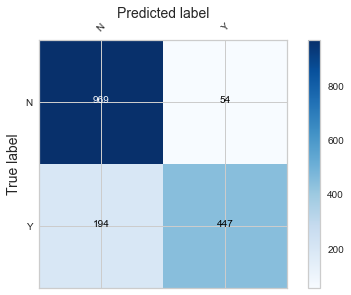

In [122]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
matrix = confusion_matrix(y_test,y_pred)
class_names=['N','Y']

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

---------------------------------------

## Random Forest

In [96]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
classes=['N','Y']


kf = KFold(n_splits=2)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  # See comment on ravel and  y_train



    model = RandomForestClassifier(n_estimators=400, max_depth= 30, max_features=0.5, criterion='gini', min_samples_split=20) 
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof("RF_Unbalanced_{}.pdf".format(fold), clear_figure=True) 
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    f1=f1_score(y_test, y_pred, average='micro')
    print(f'f-score: {f1}')
    print(classification_report_imbalanced(y_test, y_pred))

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



For fold 1:
Accuracy: 0.8245192307692307
f-score: 0.8245192307692307
                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.91      0.71      0.86      0.80      0.66       957
         YY       0.85      0.71      0.91      0.77      0.80      0.63       707

avg / total       0.83      0.82      0.79      0.82      0.80      0.65      1664



/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



For fold 2:
Accuracy: 0.8395432692307693
f-score: 0.8395432692307693
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.90      0.74      0.87      0.82      0.68      1023
         YY       0.82      0.74      0.90      0.78      0.82      0.66       641

avg / total       0.84      0.84      0.80      0.84      0.82      0.67      1664



<Figure size 432x288 with 0 Axes>

In [97]:
df.columns

Index(['truth', 'A1_0', 'A1_1', 'A2_0', 'A2_1', 'A3_0', 'A3_1', 'age_19-29',
       'age_30-39', 'age__=18', 'age__=40', 'sex_female', 'sex_male',
       'org_is-org', 'org_non-org'],
      dtype='object')

------------------

## XGBoost

In [98]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from xgboost import XGBClassifier
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
classes=['Y','N']


kf = KFold(n_splits=2)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  # See comment on ravel and  y_train

    model = XGBClassifier(max_depth=8, gamma=0.063, colsample_bytree=0.71)
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof("XGB_Unbalanced_{}.pdf".format(fold), clear_figure=True) 
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    f1=f1_score(y_test, y_pred, average='micro')
    print(f'f-score: {f1}')
    print(classification_report_imbalanced(y_test, y_pred))

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



For fold 1:
Accuracy: 0.8293269230769231
f-score: 0.8293269230769231
                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.91      0.72      0.86      0.81      0.67       957
         YY       0.86      0.72      0.91      0.78      0.81      0.64       707

avg / total       0.83      0.83      0.80      0.83      0.81      0.66      1664



/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



For fold 2:
Accuracy: 0.8347355769230769
f-score: 0.8347355769230769
                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.90      0.73      0.87      0.81      0.67      1023
         YY       0.82      0.73      0.90      0.77      0.81      0.65       641

avg / total       0.83      0.83      0.80      0.83      0.81      0.66      1664



<Figure size 432x288 with 0 Axes>